In [27]:
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [4]:
# parameters
nx = 41 # number of points in x direction
ny = 41 # number of points in y direction
xmin, xmax = 0.0, 1.0 # domain limits in x direction
ymin, ymax = -0.5, 0.5 # domain limits in y direction
Lx = (xmax - xmin) # domain length
Ly = (ymax - ymin) # domain length
dx = Lx / (nx - 1) # grid spacing
dy = Ly / (ny - 1) # grid spacing

# create grid locations
x = np.linspace(xmin, xmax, num=nx)
y = np.linspace(ymin, ymax, num=ny)

In [5]:
def rhs_poisson(x, y, Lx, Ly):
    X, Y = np.meshgrid(x, y)
    b = (-2.0 * np.pi / Lx * np.pi / Ly * 
        np.sin(np.pi * X / Lx) *
        np.cos(np.pi * Y / Ly))
    return b

In [7]:
def l2_norm(p, p_ref):
    
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) /
               numpy.sqrt(numpy.sum(p_ref**2)))
    return l2_diff

In [18]:
# this next equation solves the 2D poisson equation
# using Jacobi relaxation method.

def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    
    p = p0.copy()
    conv = [] # convergence history
    diff = rtol + 1.0 # initial difference 
    ite = 0 # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                        (2.0 * (dx**2 + dy**2)))
        # dirichlet boundray conditions are automatically enforced
        # now, compute and record the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [19]:
# the 3D plotting function we used in the last notebook

from mpl_toolkits import mplot3d
from matplotlib import cm

def plot_3d(x, y, u):
    fig = pyplot.figure(figsize = (8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=30.0, azim=45.0)
    

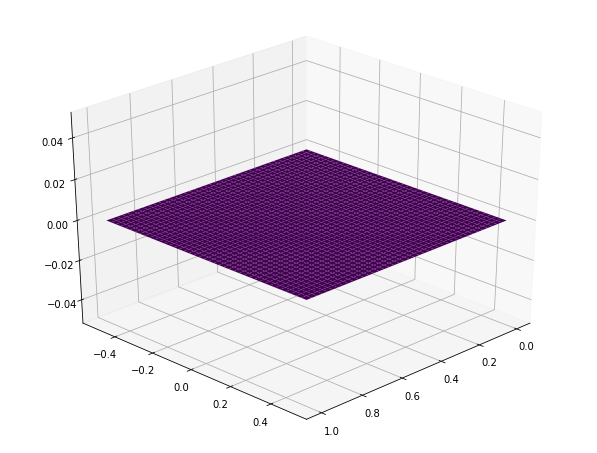

In [20]:
# now e initialize all problem variables and plot!

# initial conditions
p0 = np.zeros((ny, nx))

# compute the soure term
b = rhs_poisson(x, y, Lx, Ly)

# plot initial scalar field
plot_3d(x, y, p0)

In [21]:
# compute solution using Jacobi relaxation method
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print('Jacobi Relaxation: {} iterations '.format(ites) +
     'to reach a relative difference of {}'.format(conv[-1]))

Jacobi Relaxation: 3125 iterations to reach a relative difference of 1.9958631078740742e-07


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


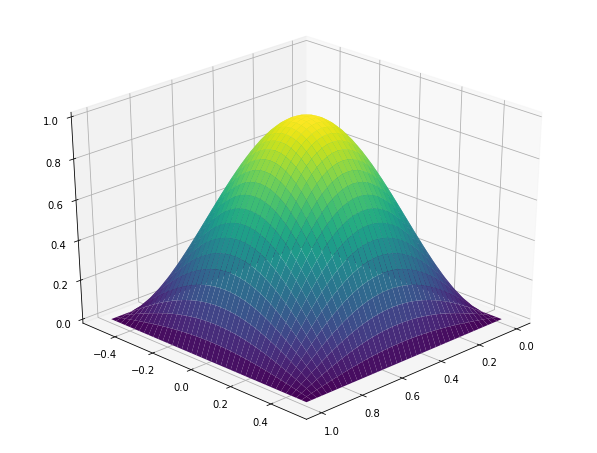

In [22]:
# plot the solution
plot_3d(x, y, p)

In [23]:
# now we'll calculate the analitical solution
# to analyze our error

def poisson_solution(x, y, Lx, Ly):
    
    X, Y = np.meshgrid(x, y)
    p = np.sin(np.pi * X/ Lx) * np.cos(np.pi * Y / Ly)
    return p

In [24]:
p_exact = poisson_solution(x, y, Lx, Ly)

In [25]:
l2_norm(p, p_exact)

0.00044962635351968803

In [26]:
# now we will look into the Algebraic convergence

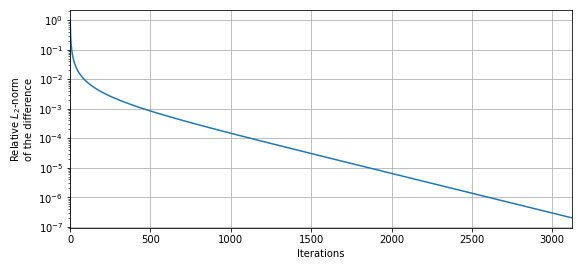

In [29]:
py.figure(figsize=(9.0, 4.0))
py.xlabel('Iterations')
py.ylabel('Relative $L_2$-norm\nof the difference')
py.grid()
py.semilogy(conv)
py.xlim(0, len(conv));

In [30]:
# now we will look into the spacial convergence

In [32]:
# lis of grid sizes to investigate
nx_values = [11, 21, 41, 81]

#create empty list to record error
errors = []

# compute solution and error for each grid size
for nx in nx_values:
    ny = nx
    dx = Lx / (nx - 1)
    dy = Ly / (ny - 1)
    
    x = np.linspace(xmin, xmax, num=nx)
    y = np.linspace(ymin, ymax, num=ny)
    
    p0 = np.zeros((ny, nx))
    
    # compute rhs
    
    b = rhs_poisson(x, y, Lx, Ly)
    
    # relax the solution
    
    p, ites, _ = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
    print('[nx = {}] number of jacobi iterations: {}'.format(nx, ites))
    # compute analitical solution
    p_exact = poisson_solution(x, y, Lx, Ly)
    # compute and record relative L2-norm of error
    errors.append(l2_norm(p, p_exact))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


[nx = 11] number of jacobi iterations: 249
[nx = 21] number of jacobi iterations: 892
[nx = 41] number of jacobi iterations: 3125
[nx = 81] number of jacobi iterations: 10708


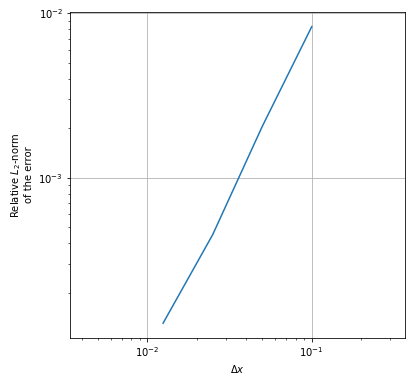

In [33]:
# plot error versus grid spacing
py.figure(figsize=(6.0, 6.0))
py.xlabel(r'$\Delta x$')
py.ylabel('Relative $L_2$-norm\nof the error')
py.grid()
dx_values = Lx / (np.array(nx_values) -1)
py.loglog(dx_values, errors)
py.axis('equal');
          